In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
# path = '/home/origene/Documents/Think it/Lockdowns-Impact-on-Air-Quality-main/data/processed/'
# france = pd.read_csv(path + 'france_data.csv')
# france['Date']= pd.to_datetime(france['Date'])
# france_lock = pd.read_csv(path + 'france_lockdown.csv')

france = pd.read_csv('/content/french_data.csv')
# france_lock = pd.read_csv('/content/french_data.csv')
france['Date'] = pd.to_datetime(france['Date'])

# Set the date column as the index of your DataFrame meat
# france = france.set_index('Date')

# Evaluating data distribution

In [ ]:
france.type.value_counts()

0    232035
2     32367
1      8050
Name: type, dtype: int64

# Evaluating number of species

In [ ]:
france.Specie.value_counts()

pm10             27973
no2              27956
temperature      27471
pressure         27468
humidity         27376
o3               26983
pm25             25515
wind-speed       24248
dew              21920
wind-gust        17338
so2               8582
co                5434
wind speed        2193
wind gust         1963
precipitation       32
Name: Specie, dtype: int64

# Checking if there is any missing values

In [ ]:
ind1 = france[["min","max","median","variance"]]
percent_missing = ind1.isnull().sum() * 100 / len(ind1)
missing_value_df = pd.DataFrame({'column_name': ind1.columns,
                                 'percent_missing': percent_missing})
# ind1 = ind1.T
missing_value_df

,column_name,percent_missing
min,min,0.0
max,max,0.0
median,median,0.0
variance,variance,0.0


In [ ]:
france = france.sort_values(['City','Specie'])
france

,Date,Country,City,Specie,count,min,max,median,variance,type
117,2018-12-31,FR,Amiens,humidity,72,98.0,98.0,98.0,0.00,0
344,2019-01-01,FR,Amiens,humidity,72,90.1,98.0,95.7,66.01,0
628,2019-01-02,FR,Amiens,humidity,72,85.3,98.0,95.0,151.81,0
885,2019-01-03,FR,Amiens,humidity,72,91.1,98.0,98.0,33.78,0
1004,2019-01-04,FR,Amiens,humidity,72,90.0,98.0,98.0,58.89,0
...,...,...,...,...,...,...,...,...,...,...
271242,2021-11-03,FR,Tours,wind-speed,72,1.0,4.8,2.3,10.55,0
271526,2021-11-04,FR,Tours,wind-speed,72,1.2,4.3,1.8,8.03,0
271766,2021-11-05,FR,Tours,wind-speed,72,1.0,3.0,2.3,3.52,0
272200,2021-11-06,FR,Tours,wind-speed,72,0.5,2.8,1.5,4.53,0


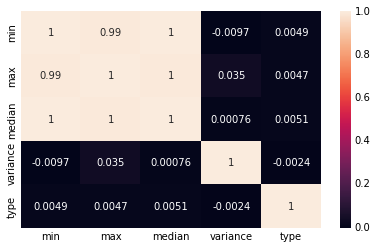

In [ ]:
import seaborn as sns
correlation_mat = france[["min","max","median","variance","type"]].corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

# Humidity

In [ ]:
humidity = france[france["Specie"]== "humidity"]
humidity = humidity[["min","max","median","variance"]]
# humidity

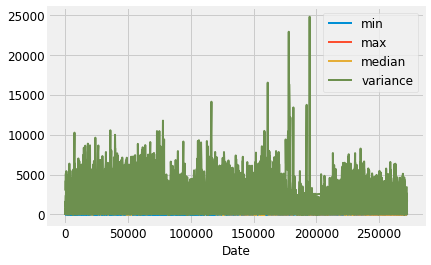

In [ ]:
# Plot time series dataset
ax = humidity.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

# pm10

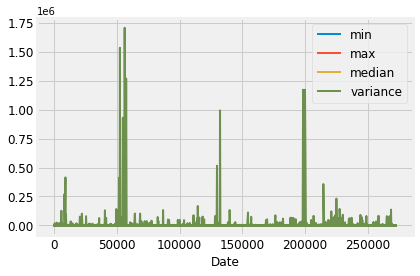

In [ ]:
pm10 = france[france["Specie"]== "pm10"]
pm10 = pm10[["min","max","median","variance"]]

# Plot time series dataset
ax = pm10.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

# no2

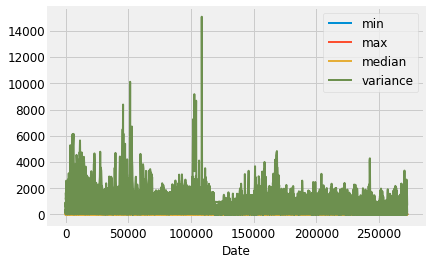

In [ ]:
no2 = france[france["Specie"]== "no2"]
no2 = no2[["min","max","median","variance"]]

# Plot time series dataset
ax = no2.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

# Variables

pm10             
no2              
temperature      
pressure        
humidity         
o3               
pm25            
wind-speed       
dew             
wind-gust       
so2               
co                
wind speed       
wind gust         
precipitation  

In [ ]:
pm10 = france[france["Specie"]== "pm10"]
pm10_1 = pm10[["Date","Country","City","median"]]
pm10_1=pm10_1.rename(columns = {'median':'pm10'})

no2 = france[france["Specie"]== "no2"]
no2_1 = no2[["Date","median"]]
no2_1=no2_1.rename(columns = {'median':'no2'})

temperature = france[france["Specie"]== "temperature"]
temperature_1 = temperature[["Date","median"]]

pressure = france[france["Specie"]== "pressure"]
pressure_1 = pressure[["Date","median"]]

humidity = france[france["Specie"]== "humidity"]
humidity_1 = humidity[["Date","median"]]

o3 = france[france["Specie"]== "o3"]
o3_1 = o3[["Date","median"]]

pm25 = france[france["Specie"]== "pm25"]
pm25_1 = pm25[["Date","median"]]

wind_speed = france[france["Specie"]== "wind-speed"]
wind_speed_1 = wind_speed[["Date","median"]]


dew = france[france["Specie"]== "dew"]
dew_1 = dew[["Date","median"]]



so2 = france[france["Specie"]== "so2"]
so2_1 = so2[["Date","median"]]

co = france[france["Specie"]== "co"]
co_1 = co[["Date","median"]]


precipitation = france[france["Specie"]== "precipitation"]
precipitation_1 = precipitation[["Date","median"]]


In [ ]:
# df4 = pd.concat([pm10_1, no2_1], axis=1)
# pm10_1.join(no2_1, on='Date', how='left', lsuffix='_left', rsuffix='_right')
# pm10_1.join(no2_1, how='outer')
# df = pd.merge(pm10_1,no2_1[['median']],on='Date', how='left')
pm10_1.merge(no2_1[['no2', 'Date']], on = 'Date', how = 'left')

,Date,Country,City,pm10,no2
0,2018-12-31,FR,Amiens,10.0,6.2
1,2018-12-31,FR,Amiens,10.0,10.8
2,2018-12-31,FR,Amiens,10.0,6.0
3,2018-12-31,FR,Amiens,10.0,13.3
4,2018-12-31,FR,Amiens,10.0,15.0
...,...,...,...,...,...
796627,2021-11-07,FR,Tours,14.0,5.0
796628,2021-11-07,FR,Tours,14.0,7.8
796629,2021-11-07,FR,Tours,14.0,18.4
796630,2021-11-07,FR,Tours,14.0,3.8


In [ ]:
france.head()

,Date,Country,City,Specie,count,min,max,median,variance,type
117,2018-12-31,FR,Amiens,humidity,72,98.0,98.0,98.0,0.00,0
344,2019-01-01,FR,Amiens,humidity,72,90.1,98.0,95.7,66.01,0
628,2019-01-02,FR,Amiens,humidity,72,85.3,98.0,95.0,151.81,0
885,2019-01-03,FR,Amiens,humidity,72,91.1,98.0,98.0,33.78,0
1004,2019-01-04,FR,Amiens,humidity,72,90.0,98.0,98.0,58.89,0


In [ ]:
france_clean = france.pivot_table(index=['Date', 'Country', 'City','type'],columns='Specie',values='variance').reset_index().sort_values(['Country','City'])

In [ ]:
france_clean.head(15)

Specie,Date,Country,City,type,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wind gust,wind speed,wind-gust,wind-speed
0,2018-12-31,FR,Amiens,0,NaN,NaN,0.00,404.24,273.98,63.32,1273.63,NaN,2.27,0.08,2.37,NaN,NaN,4.90,1.05
23,2019-01-01,FR,Amiens,0,NaN,NaN,66.01,308.52,99.04,337.62,350.49,NaN,8.75,0.05,3.51,NaN,NaN,7.39,6.01
47,2019-01-02,FR,Amiens,0,NaN,NaN,151.81,360.68,133.13,39.17,716.48,NaN,15.87,0.80,9.35,NaN,NaN,2.54,2.16
72,2019-01-03,FR,Amiens,0,NaN,NaN,33.78,450.85,620.24,167.10,1318.74,NaN,1.76,0.39,10.72,NaN,NaN,1.74,1.93
97,2019-01-04,FR,Amiens,0,NaN,NaN,58.89,505.75,365.41,307.30,1407.69,NaN,3.52,0.35,8.35,NaN,NaN,4.02,3.68
122,2019-01-05,FR,Amiens,0,NaN,NaN,174.76,275.17,77.02,277.47,393.07,NaN,2.16,0.19,5.94,NaN,NaN,10.06,7.85
147,2019-01-06,FR,Amiens,0,NaN,NaN,153.70,559.35,170.91,156.11,270.77,NaN,2.41,0.20,15.95,NaN,NaN,12.76,9.17
172,2019-01-07,FR,Amiens,0,NaN,NaN,1.53,483.59,500.50,218.79,2751.57,NaN,73.97,0.44,13.28,NaN,NaN,17.97,6.65
197,2019-01-08,FR,Amiens,0,NaN,NaN,975.78,220.97,48.71,97.33,550.14,NaN,2.86,0.45,13.97,NaN,NaN,6.33,8.67
222,2019-01-09,FR,Amiens,0,NaN,NaN,599.60,392.10,193.10,57.48,340.00,NaN,5.75,0.71,10.07,NaN,NaN,12.77,6.08


In [ ]:
france_clean[france_clean['City']=='Amiens']

Specie,Date,Country,City,type,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wind gust,wind speed,wind-gust,wind-speed
0,2018-12-31,FR,Amiens,0,NaN,NaN,0.00,404.24,273.98,63.32,1273.63,NaN,2.27,0.08,2.37,NaN,NaN,4.90,1.05
23,2019-01-01,FR,Amiens,0,NaN,NaN,66.01,308.52,99.04,337.62,350.49,NaN,8.75,0.05,3.51,NaN,NaN,7.39,6.01
47,2019-01-02,FR,Amiens,0,NaN,NaN,151.81,360.68,133.13,39.17,716.48,NaN,15.87,0.80,9.35,NaN,NaN,2.54,2.16
72,2019-01-03,FR,Amiens,0,NaN,NaN,33.78,450.85,620.24,167.10,1318.74,NaN,1.76,0.39,10.72,NaN,NaN,1.74,1.93
97,2019-01-04,FR,Amiens,0,NaN,NaN,58.89,505.75,365.41,307.30,1407.69,NaN,3.52,0.35,8.35,NaN,NaN,4.02,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26900,2021-11-03,FR,Amiens,0,NaN,NaN,1107.37,NaN,NaN,319.38,1293.66,NaN,54.04,NaN,104.35,NaN,NaN,NaN,NaN
26927,2021-11-04,FR,Amiens,0,NaN,NaN,1716.23,NaN,NaN,417.65,2251.11,NaN,166.17,NaN,32.86,NaN,NaN,NaN,NaN
26954,2021-11-05,FR,Amiens,0,NaN,NaN,107.83,NaN,NaN,262.43,763.64,NaN,134.02,NaN,73.06,NaN,NaN,NaN,NaN
26981,2021-11-06,FR,Amiens,0,NaN,NaN,544.52,NaN,NaN,456.84,738.30,NaN,52.14,NaN,127.50,NaN,NaN,NaN,NaN
